# Cleaning for Random Forest 

In [1]:
from taxipred.utils.constants import TAXI_DATA
import pandas as pd

df = pd.read_csv(TAXI_DATA)

df.head(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


Since random forest is sensetive to outliers i will be checking all of them 

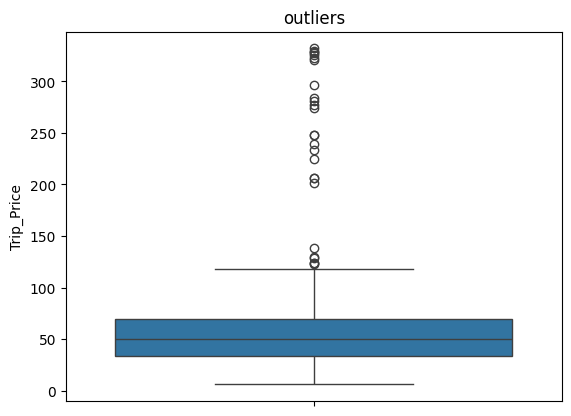

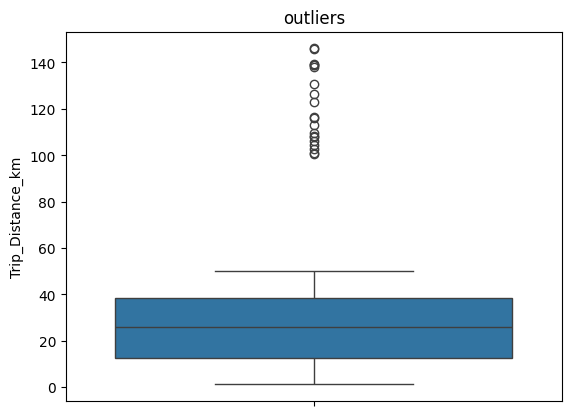

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df["Trip_Price"])
plt.title("outliers")
plt.show()


sns.boxplot(df["Trip_Distance_km"])
plt.title("outliers")
plt.show()

In [4]:
df_drop = df.drop(columns=["Weather", "Traffic_Conditions"])
df_drop

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,2.67,0.82,0.17,114.94,61.2090


In [5]:
df_drop["Passenger_Count"] = df_drop["Passenger_Count"].astype('Int64')
df_drop.head(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3,2.93,0.63,0.32,22.64,15.6180
